### Atividade de análise exploratória de dados

A análise deverá conter as seguintes seções:

* Descrição dos dados: informações sobre a quantidade de instâncias, variáveis e seus tipos, quantidade de valores faltantes, etc.
* Perguntas de partida e hipóteses: que tipo de informações podem ser obtidas a partir dos dados e quais hipóteses podem ser levantadas?
* Insights: respostas às perguntas feitas na seção anterior e quais informações interessantes podem ser levantadas através dos dados?

As modificações devem ser comitadas e enviadas para o repositório remoto no github até a data prazo desta atividade.

### Descrição dos dados

Base de dados: abalone.data

A base de dado é multivariada, não possui *Missing Values*, possui 4177 instâncias e 8 atributos, sendo eles e sua classificação:

- Sexo: variável qualitativa nominal (Male, Female, Infant)
- Comprimento: variável  quantitativa contínua (m)
- Diâmetro: variável  quantitativa contínua (m)
- Altura: variável  quantitativa contínua(m)
- Peso total: variável  quantitativa contínua (kg)
- Peso da carne: variável  quantitativa contínua (kg)
- Peso viceral: variável  quantitativa contínua (kg)
- Peso da concha: variável  quantitativa contínua (kg)
- Quantidade de aneis: variável  quantitativa contínua (inteiro)

As variáveis a serem utilizadas serão: sexo, comprimento, diâmetro, altura, peso total, quantidade de aneis


### Perguntas de partida e hipóteses

**Ponto inicial**: 
- Qual a quantidade de machos e fêmeas? 
- Qual a distribuição do comprimento, diâmetro, altura, peso e número de anéis das conchas?
- Tem diferença na distribuição do comprimento, diâmetro, altura, peso e número de anéis pela maturação sexual ou entre macho e fêmea?
- Existe correlação entre comprimento e diâmetro?
- Existe diferença entre a relação de comprimento e diâmetro pela maturação sexual?

**Insights**:
Existem mais individuos do sexo masculino na amostra, sendo  1528 machos, 1342 fêmeas, 1307 juvenis. Não tem diferença direta distribuição do comprimento, diâmetro, altura e peso pela maturação sexual, apenas de juvenil para adulto. Já o número de anéis e a relação entre comprimento e diâmetro mostram uma diferença quanto ao tempo para maturar sexualmente, onde os machos deixam de ser juvenis mais cedo. Aparentemente existe uma correlação entre o número de anéis e os atributos de altura, peso, comprimento e diâmetro, que possivelmente podem vir a ser utilizados para prever o número de anéis e consequentemente a idade do indivíduo, sem a necessidade de sacrificar o espécime e levar para laboratório para contar manualmente.

Exploração inicial dos dados:
- distribuição
- frequencia
- categorias
- regressões

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Carregando o data set e definindo uma lista com os nomes das colunas
colunas = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone = pd.read_csv('abalone.data', names=colunas)
# Vendo as 5 rimeiras linhas de dados
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Vendo as informações do dataframe
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# Vendo o tamanho do dataframe
abalone.shape

(4177, 9)

In [6]:
# Checando se existem valores nulos
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
# Os valores de comprimento estão em metros e de peso, então foram multiplicados por 100 para ficarem em centimetros
coln = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
abalone[coln] = abalone[coln].mul(100)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,45.5,36.5,9.5,51.40,22.45,10.10,15.0,15
1,M,35.0,26.5,9.0,22.55,9.95,4.85,7.0,7
2,F,53.0,42.0,13.5,67.70,25.65,14.15,21.0,9
3,M,44.0,36.5,12.5,51.60,21.55,11.40,15.5,10
4,I,33.0,25.5,8.0,20.50,8.95,3.95,5.5,7


In [8]:
# Fazendo uma descrição estatística inicial das variáveis quantitativas do dataset
abalone.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,52.399210,12.009291,7.50,45.00,54.50,61.5,81.50
Diameter,4177.0,40.788125,9.923987,5.50,35.00,42.50,48.0,65.00
Height,4177.0,13.951640,4.182706,0.00,11.50,14.00,16.5,113.00
Whole weight,4177.0,82.874216,49.038902,0.20,44.15,79.95,115.3,282.55
Shucked weight,4177.0,35.936749,22.196295,0.10,18.60,33.60,50.2,148.80
Viscera weight,4177.0,18.059361,10.961425,0.05,9.35,17.10,25.3,76.00
Shell weight,4177.0,23.883086,13.920267,0.15,13.00,23.40,32.9,100.50
Rings,4177.0,9.933684,3.224169,1.00,8.00,9.00,11.0,29.00


In [9]:
# Fazendo uma descrição estatística inicial das variáveis qualitativas do dataset
abalone.describe(include=['O']).T

,count,unique,top,freq
Sex,4177,3,M,1528


In [10]:
abalone['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Existem mais machos do que fêmeas na base de dados

### Sexo

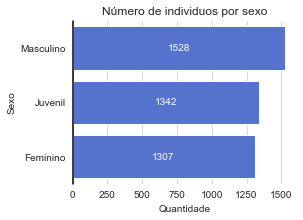

In [11]:
# colocando em ordem os dados pelo sexo
df = abalone.sort_values(by='Sex', ascending=False)
df['Sex'] = df['Sex'].replace([['M'],['F'],['I']], ['Masculino', 'Feminino','Juvenil'])
# Definindo o estilo do g´rafico
sns.set_style("whitegrid")

# definindo tamanho da figura
plt.figure(figsize=(4, 3))
# Plotando um grafico de barras contando a quantidade de individuoes por sexo
ax = sns.countplot(data=df, y='Sex', color='royalblue')
#Definindo nome dos eixos
plt.ylabel('Sexo')
plt.xlabel('Quantidade')
plt.title('Número de individuos por sexo')
# Colocando os valores de cada coluna
ax.bar_label(
    ax.containers[0],
    fmt='%.0f',
    label_type='center',
    color='white'
)
# Removendo as bordas do gráfico
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.show()

## Análise de dispersão

### Comprimento

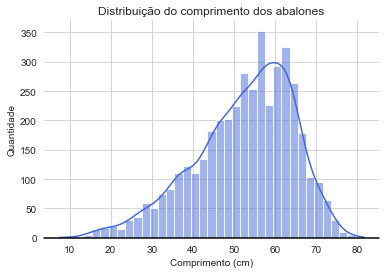

In [121]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
ax = sns.histplot(data=df, x='Length', kde=True, color='royalblue')
plt.ylabel('Quantidade')
plt.xlabel('Comprimento (cm)')
plt.title('Distribuição do comprimento dos abalones')

# retirando bordas
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()



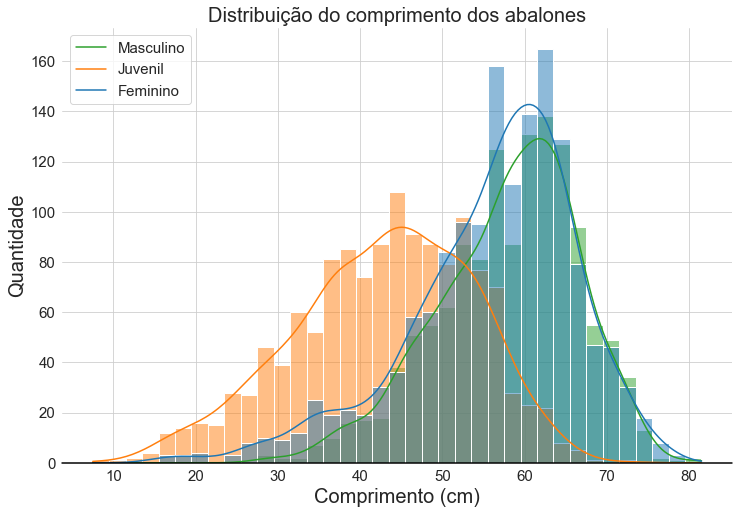

In [13]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Length', kde=True, hue='Sex',legend=False)

plt.ylabel('Quantidade',fontsize=20)
plt.xlabel('Comprimento (cm)',fontsize=20)
plt.title('Distribuição do comprimento dos abalones',fontsize=20)
plt.legend(title='', loc='upper left', labels=df['Sex'].unique(),fontsize=15)

# retirando bordas
ax.tick_params(labelsize=15)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()


(0.0, 90.0)

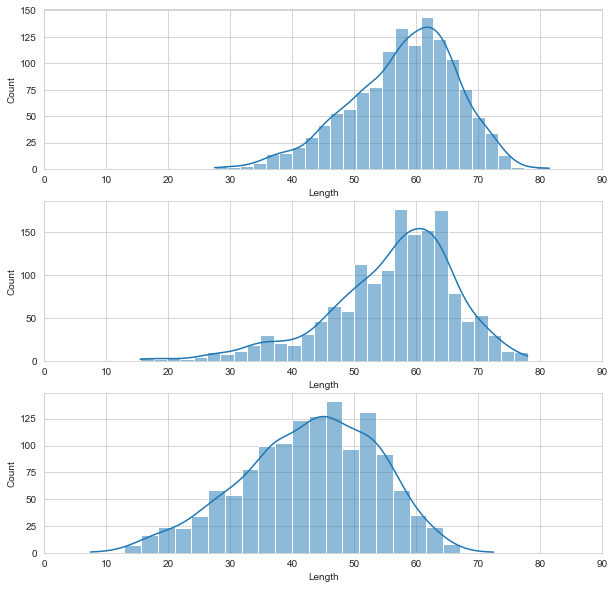

In [14]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
ax1 = sns.histplot(ax = axes[0], data=df[df['Sex']=='Feminino'], x='Length', kde=True)
ax2 = sns.histplot(ax = axes[1], data=df[df['Sex']=='Masculino'], x='Length', kde=True)
ax3 = sns.histplot(ax = axes[2], data=df[df['Sex']=='Juvenil'], x='Length', kde=True)
ax1.set_xlim(0,90)
ax2.set_xlim(0,90)
ax3.set_xlim(0,90)



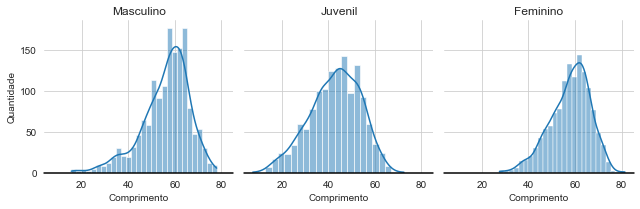

In [51]:

ax = sns.FacetGrid(data=df,col='Sex')
ax.map(sns.histplot,'Length',kde=True)
ax.set(frame_on=False)
axes = ax.axes.flatten()
axes[0].set_title("Masculino")
axes[1].set_title("Juvenil")
axes[2].set_title("Feminino")
axes[0].set_ylabel("Quantidade")
for ax in axes:
    ax.set_xlabel("Comprimento")
    ax.axhline(0, color="k", clip_on=False)
plt.show()

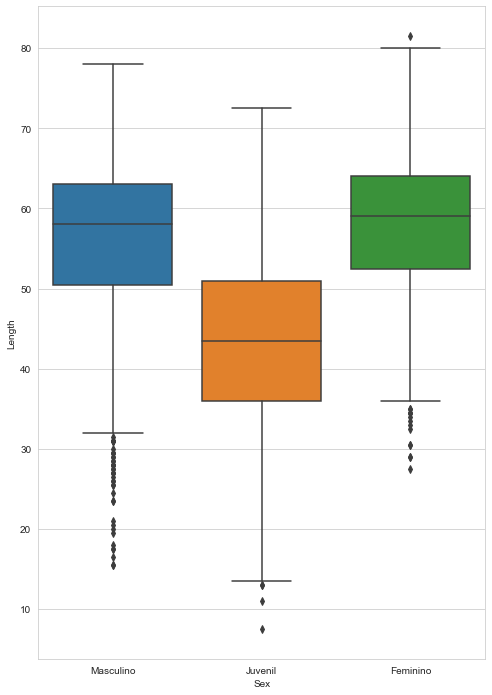

In [16]:
fig = plt.figure(figsize=(8, 12))
ax = sns.boxplot(data=df,x='Sex',y='Length')

### Altura

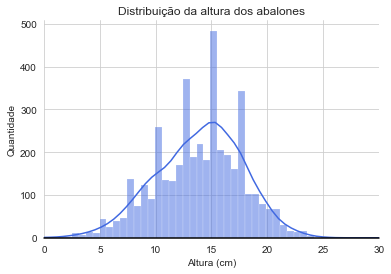

In [123]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
ax = sns.histplot(data=df, x='Height', kde=True, color='royalblue')
plt.ylabel('Quantidade')
plt.xlabel('Altura (cm)')
plt.title('Distribuição da altura dos abalones')

# retirando bordas
ax.set_xlim(0,30)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()



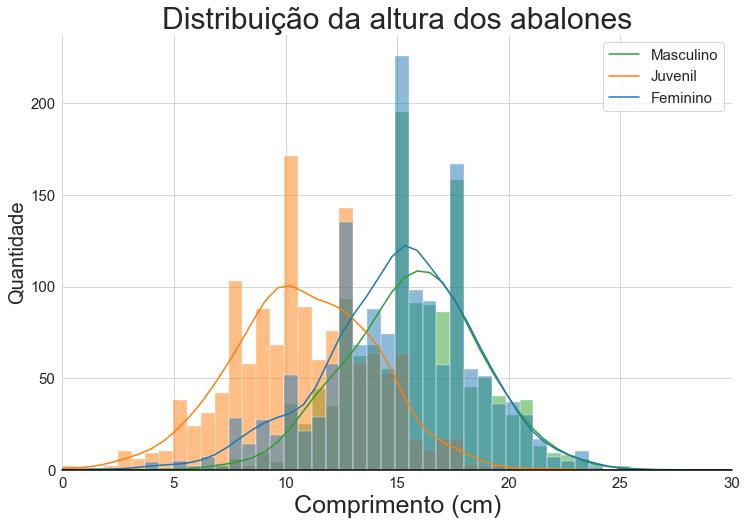

In [18]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Height', kde=True, hue='Sex',legend=False)

plt.ylabel('Quantidade', fontsize=20)
plt.xlabel('Altura (cm)', fontsize=25)
plt.title('Distribuição da altura dos abalones', fontsize=30)
plt.legend(title='', loc='upper right', labels=df['Sex'].unique(), fontsize=15)

# retirando bordas
ax.tick_params(labelsize=15)
ax.set_xlim(0,30)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()


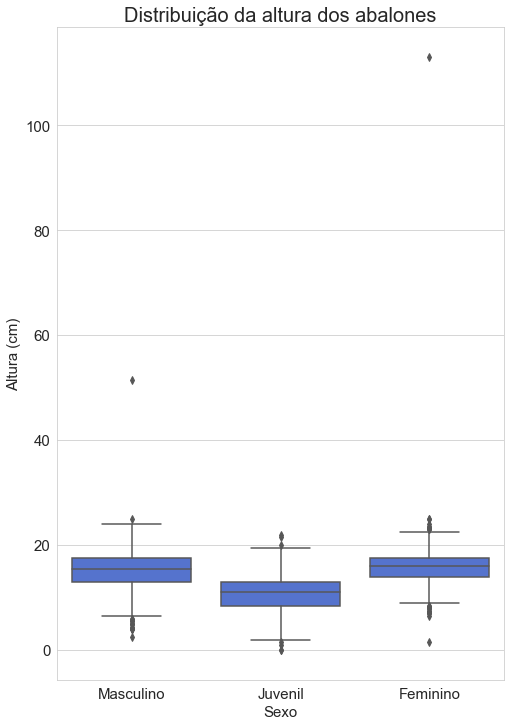

In [19]:
fig = plt.figure(figsize=(8, 12))
ax = sns.boxplot(data=df,x='Sex',y='Height', color='royalblue')
plt.ylabel('Altura (cm)', fontsize=15)
plt.xlabel('Sexo', fontsize=15)
plt.title('Distribuição da altura dos abalones', fontsize=20)
ax.set(frame_on=True)
ax.tick_params(labelsize=15)
plt.show()

Existem dois outliers bem discrepantes na altura, tratar os dados

### Peso

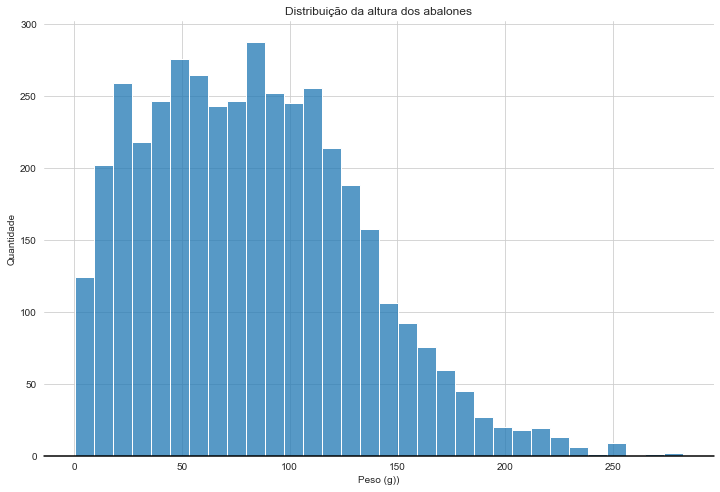

In [20]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Whole weight')

plt.ylabel('Quantidade')
plt.xlabel('Peso (g))')
plt.title('Distribuição do peso dos abalones')

# retirando bordas
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()


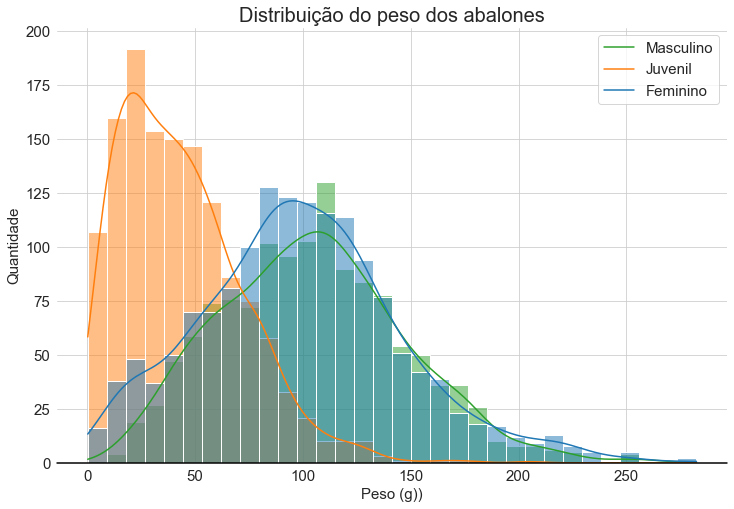

In [126]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x='Whole weight', kde=True, hue='Sex',legend=False)

plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Peso (g))', fontsize=15)
plt.title('Distribuição do peso dos abalones', fontsize=20)
plt.legend(title='', loc='upper right', labels=df['Sex'].unique(), fontsize=15)

# retirando bordas
ax.tick_params(labelsize=15)
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()


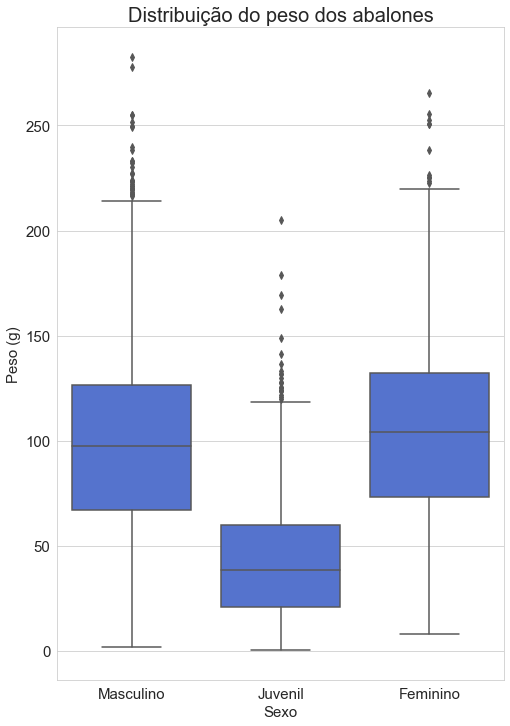

In [127]:
fig = plt.figure(figsize=(8, 12))
ax = sns.boxplot(data=df,x='Sex',y='Whole weight', color='royalblue')
plt.ylabel('Peso (g)', fontsize=15)
plt.xlabel('Sexo', fontsize=15)
plt.title('Distribuição do peso dos abalones', fontsize=20)
ax.set(frame_on=True)
ax.tick_params(labelsize=15)
plt.show()

### Quantidade de anéis

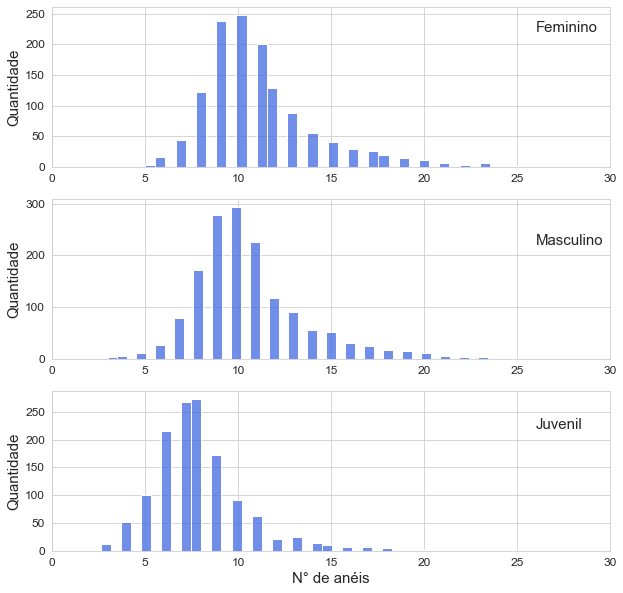

In [43]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
ax1 = sns.histplot(ax = axes[0], data=df[df['Sex']=='Feminino'], x='Rings', color='royalblue')
plt.ylabel('N° de anéis', fontsize=15)
plt.xlabel('Quantidade', fontsize=15)
ax2 = sns.histplot(ax = axes[1], data=df[df['Sex']=='Masculino'], x='Rings', color='royalblue')
ax3 = sns.histplot(ax = axes[2], data=df[df['Sex']=='Juvenil'], x='Rings', color='royalblue')
ax1.set_xlim(0,30)
ax2.set_xlim(0,30)
ax3.set_xlim(0,30)
ax1.set_xlabel('')
ax1.set_ylabel('Quantidade', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Quantidade', fontsize=15)
ax3.set_xlabel('N° de anéis', fontsize=15)
ax3.set_ylabel('Quantidade', fontsize=15)
ax1.annotate('Feminino',(26,220), fontsize=15)
ax2.annotate('Masculino',(26,220), fontsize=15)
ax3.annotate('Juvenil',(26,220), fontsize=15)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)


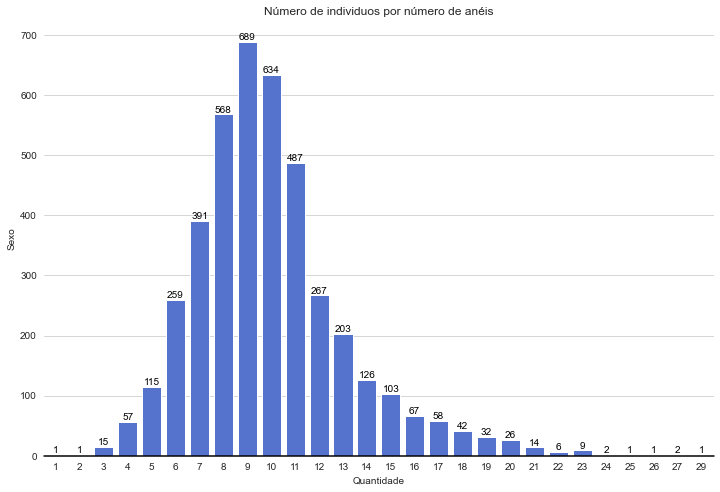

In [24]:
# Definindo o estilo do g´rafico
sns.set_style("whitegrid")

# definindo tamanho da figura
plt.figure(figsize=(12, 8))
# Plotando um grafico de barras contando a quantidade de individuoes por sexo
ax = sns.countplot(data=df.sort_values(by='Rings', ascending=False), x='Rings', color='royalblue')
#Definindo nome dos eixos
plt.ylabel('Sexo')
plt.xlabel('Quantidade')
plt.title('Número de individuos por número de anéis')
# Colocando os valores de cada coluna
ax.bar_label(
    ax.containers[0],
    fmt='%.0f',
    label_type='edge',
    color='black'
)
# Removendo as bordas do gráfico
ax.set(frame_on=False)
ax.axhline(0, color="k", clip_on=False)
plt.show()

## Plots relacionais

In [26]:
# Preparando para faer um pairplot
# primeiro retirando as colunas que não serão avaliadas
df.drop(columns=['Shucked weight', 'Viscera weight', 'Shell weight'], inplace=True)

In [27]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Rings
0,Masculino,45.5,36.5,9.5,51.40,15
2147,Masculino,46.0,37.5,13.5,49.35,12
2133,Masculino,44.0,35.0,11.0,45.85,9
2135,Masculino,56.5,42.5,10.0,71.45,12
2139,Masculino,68.0,53.0,20.5,149.60,14


<Figure size 720x720 with 0 Axes>

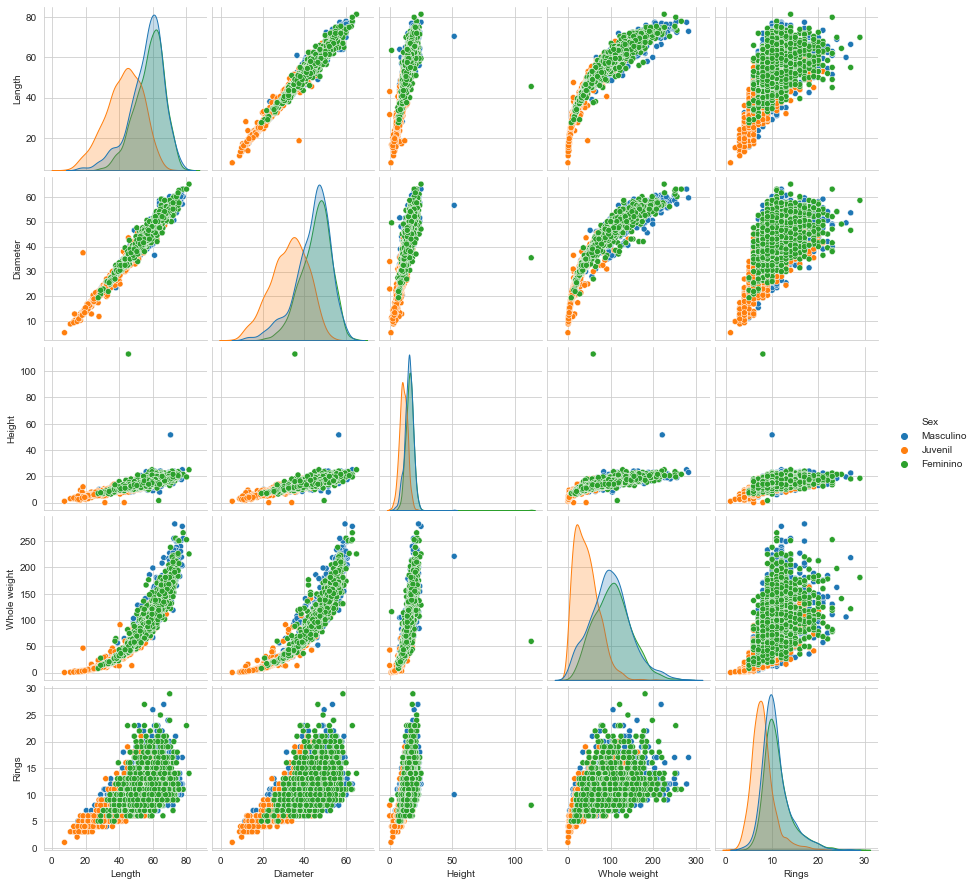

In [28]:
# Fazendo um pairplot
plt.figure(figsize=(10,10))
ax = sns.pairplot(data=df,hue='Sex')

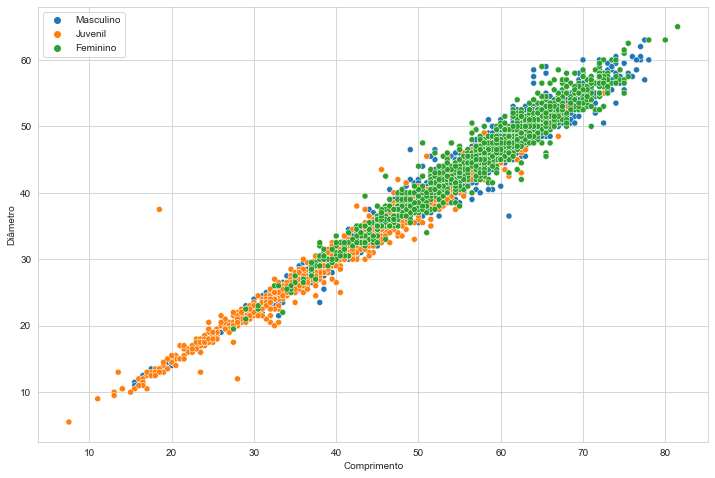

In [93]:
# comprimento x diâmetro
plt.figure(figsize=(12,8))
fig = sns.scatterplot(x='Length',y='Diameter',data=df,hue='Sex')
plt.xlabel('Comprimento')
plt.ylabel('Diâmetro')
plt.legend(title='')

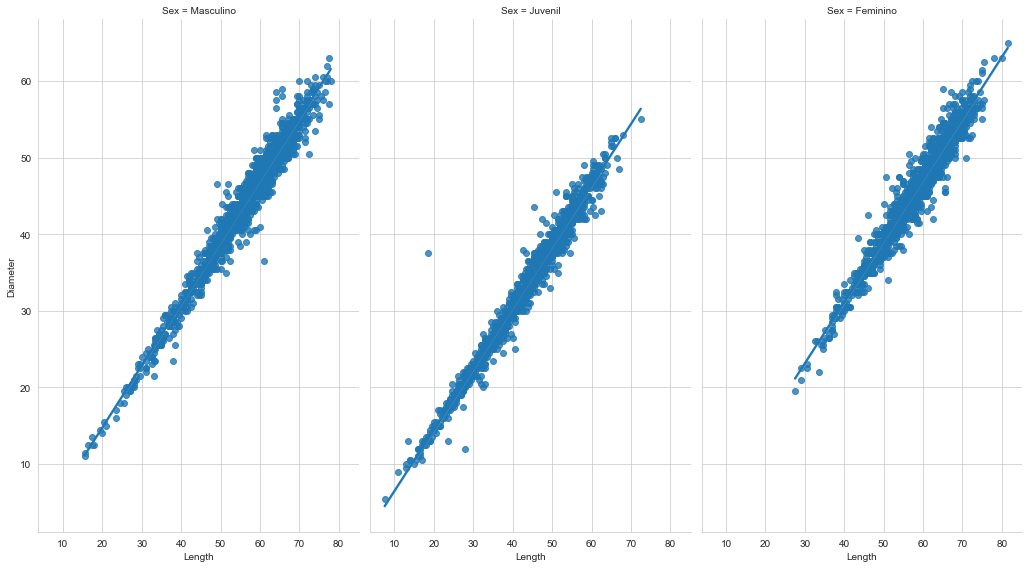

In [91]:

sns.lmplot(x='Length',y='Diameter',data=df, col='Sex', aspect=.6, height=8, fit_reg=True, ci= 95)

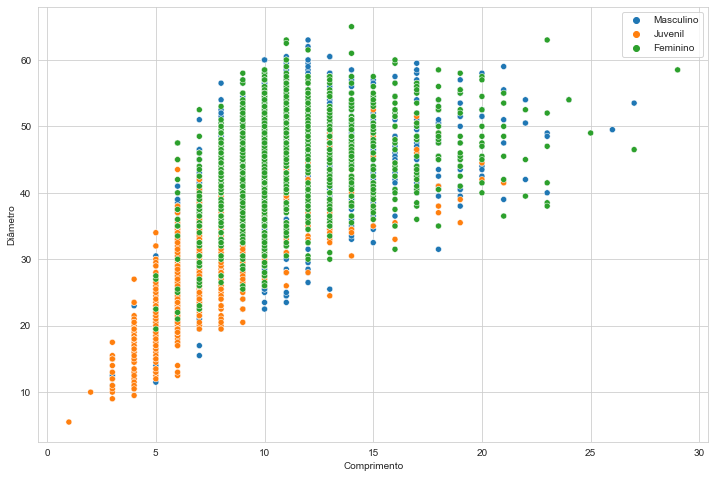

In [60]:
# comprimento x aneis
plt.figure(figsize=(12,8))
fig = sns.scatterplot(x='Rings',y='Diameter',data=df,hue='Sex')
plt.xlabel('Comprimento')
plt.ylabel('Diâmetro')
plt.legend(title='')

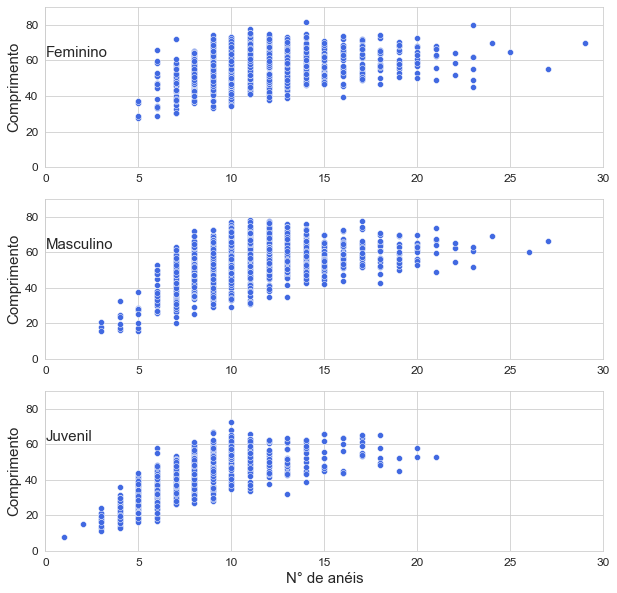

In [66]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
ax1 = sns.scatterplot(ax = axes[0], data=df[df['Sex']=='Feminino'], x='Rings', y='Length', color='royalblue')

ax2 = sns.scatterplot(ax = axes[1], data=df[df['Sex']=='Masculino'], x='Rings', y='Length', color='royalblue')
ax3 = sns.scatterplot(ax = axes[2], data=df[df['Sex']=='Juvenil'], x='Rings', y='Length', color='royalblue')
ax1.set_xlim(0,30)
ax2.set_xlim(0,30)
ax3.set_xlim(0,30)
ax1.set_ylim(0,90)
ax2.set_ylim(0,90)
ax3.set_ylim(0,90)
ax1.set_xlabel('')
ax1.set_ylabel('Comprimento', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Comprimento', fontsize=15)
ax3.set_xlabel('N° de anéis', fontsize=15)
ax3.set_ylabel('Comprimento', fontsize=15)
ax1.annotate('Feminino',(0,62), fontsize=15)
ax2.annotate('Masculino',(0,62), fontsize=15)
ax3.annotate('Juvenil',(0,62), fontsize=15)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)

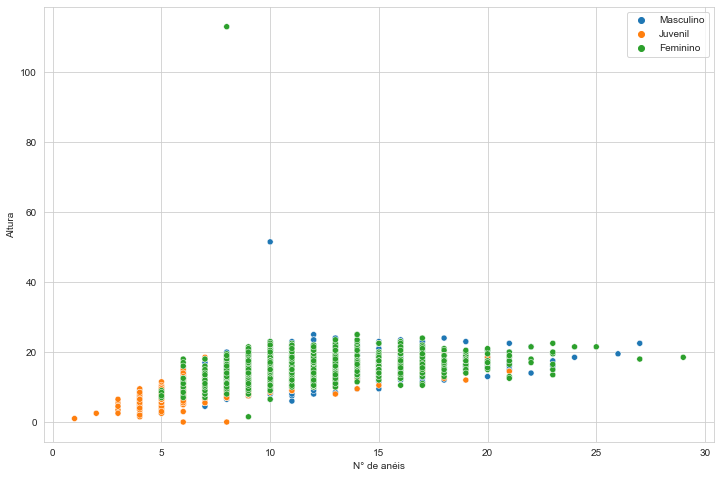

In [129]:
# comprimento x aneis
plt.figure(figsize=(12,8))
fig = sns.scatterplot(x='Rings',y='Height',data=df,hue='Sex')
plt.xlabel('N° de anéis')
plt.ylabel('Altura')
plt.legend(title='')

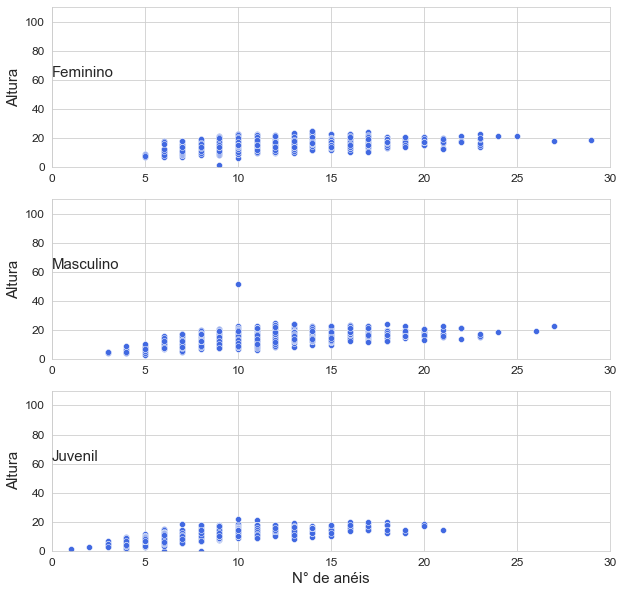

In [70]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
ax1 = sns.scatterplot(ax = axes[0], data=df[df['Sex']=='Feminino'], x='Rings', y='Height', color='royalblue')

ax2 = sns.scatterplot(ax = axes[1], data=df[df['Sex']=='Masculino'], x='Rings', y='Height', color='royalblue')
ax3 = sns.scatterplot(ax = axes[2], data=df[df['Sex']=='Juvenil'], x='Rings', y='Height', color='royalblue')
ax1.set_xlim(0,30)
ax2.set_xlim(0,30)
ax3.set_xlim(0,30)
ax1.set_ylim(0,110)
ax2.set_ylim(0,110)
ax3.set_ylim(0,110)
ax1.set_xlabel('')
ax1.set_ylabel('Altura', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Altura', fontsize=15)
ax3.set_xlabel('N° de anéis', fontsize=15)
ax3.set_ylabel('Altura', fontsize=15)
ax1.annotate('Feminino',(0,62), fontsize=15)
ax2.annotate('Masculino',(0,62), fontsize=15)
ax3.annotate('Juvenil',(0,62), fontsize=15)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)

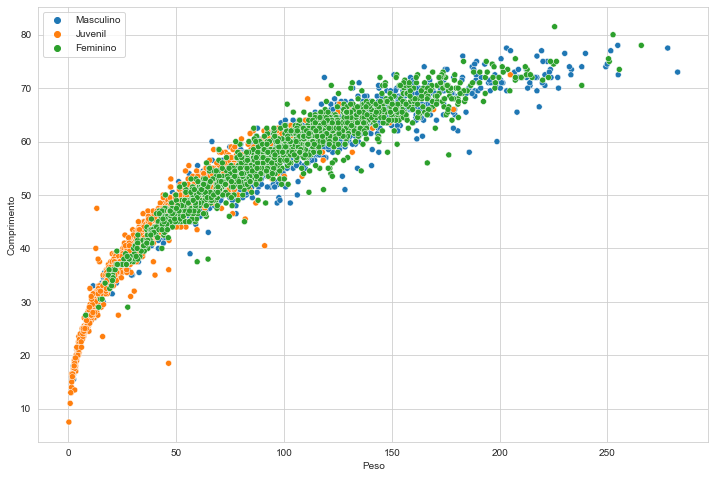

In [107]:
# peso x comprimento
plt.figure(figsize=(12,8))
fig = sns.scatterplot(x='Whole weight',y='Length',data=df,hue='Sex')
plt.xlabel('Peso')
plt.ylabel('Comprimento')
plt.legend(title='')

<AxesSubplot:xlabel='Whole weight', ylabel='Length'>

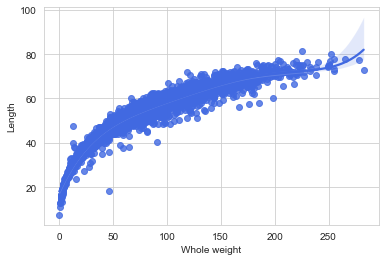

In [130]:
sns.regplot(x='Whole weight',y='Length',data=df,order=5, color='royalblue')

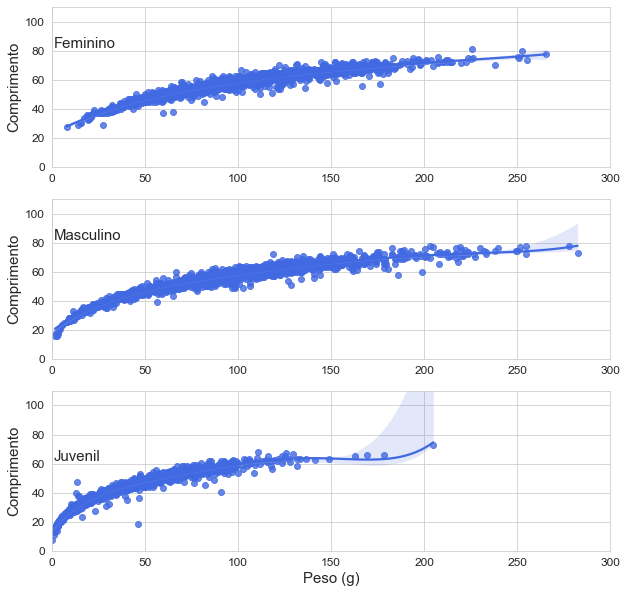

In [120]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Plotando histograma
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
ax1 = sns.regplot(ax = axes[0], data=df[df['Sex']=='Feminino'], x='Whole weight', y='Length', color='royalblue',order=5)

ax2 = sns.regplot(ax = axes[1], data=df[df['Sex']=='Masculino'], x='Whole weight', y='Length', color='royalblue',order=5)
ax3 = sns.regplot(ax = axes[2], data=df[df['Sex']=='Juvenil'], x='Whole weight', y='Length', color='royalblue',order=5)
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)
ax3.set_xlim(0,300)
ax1.set_ylim(0,110)
ax2.set_ylim(0,110)
ax3.set_ylim(0,110)
ax1.set_xlabel('')
ax1.set_ylabel('Comprimento', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Comprimento', fontsize=15)
ax3.set_xlabel('Peso (g)', fontsize=15)
ax3.set_ylabel('Comprimento', fontsize=15)
ax1.annotate('Feminino',(1,82), fontsize=15)
ax2.annotate('Masculino',(1,82), fontsize=15)
ax3.annotate('Juvenil',(1,62), fontsize=15)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax3.tick_params(labelsize=12)